In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/databbva2023/digital.csv
/kaggle/input/databbva2023/Diccionario de datos.xlsx
/kaggle/input/databbva2023/archive/sample_submission.csv
/kaggle/input/databbva2023/archive/balances.csv
/kaggle/input/databbva2023/archive/universe_train.csv
/kaggle/input/databbva2023/archive/movements.csv
/kaggle/input/databbva2023/archive/liabilities.csv
/kaggle/input/databbva2023/archive/universe_test.csv
/kaggle/input/databbva2023/archive/customers.csv


In [4]:

!pip install  dask_sql
#!pip install dask

  Obtaining dependency information for dask_sql from https://files.pythonhosted.org/packages/c3/e9/5bf3d08e753371aef0656c7380bdbc03fd250c0172504370b7655d86241a/dask_sql-2024.5.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for dask[dataframe]>=2024.4.1 from https://files.pythonhosted.org/packages/2a/72/33ff765a07913cb5061baa94718f3a17003aa29adc89642a68c295d47582/dask-2024.11.2-py3-none-any.whl.metadata
  Obtaining dependency information for distributed>=2024.4.1 from https://files.pythonhosted.org/packages/f0/24/312287ead487290c13e62f6d987e59eb0e22b8088b3539dfe6f4062a8370/distributed-2024.11.2-py3-none-any.whl.metadata
  Obtaining dependency information for httpx>=0.24.1 from https://files.pythonhosted.org/packages/8f/fb/a19866137577ba60c6d8b69498dc36be479b13ba454f691348ddf428f185/httpx-0.28.0-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpickle>=3.0.0 from https://files.pythonhosted.org/packages/48/41/e1d8

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
from dask_sql import Context
c = Context()
dfx = pd.DataFrame({"a": [1, 2, 3], })
c.create_table("pandas", dfx)
c.sql("SELECT * FROM pandas limit 10 ").compute()

,a
0,1
1,2
2,3


In [24]:
%%time
import dask.dataframe as dd
from dask_sql import Context


c = Context()
df = dd.read_csv("/kaggle/input/databbva2023/archive/movements.csv")

CPU times: user 617 µs, sys: 0 ns, total: 617 µs
Wall time: 626 µs


In [20]:
%%time
df.head()

CPU times: user 1.23 s, sys: 168 ms, total: 1.4 s
Wall time: 1.41 s


,period,ID,month,type_1,type_2,type_3,type_4
0,period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c...,12,0.0000,0.0000,0.0000,3.9437
1,period_9,0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2...,1,3.7397,3.3499,0.0000,0.0000
2,period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56...,4,3.6273,3.9726,3.6655,4.4131
3,period_9,8a583965c827c377690b816c90246eaedc499f03a5f25f...,8,3.7855,4.8286,5.0000,4.5094
4,period_9,e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f00675...,7,2.6077,3.9344,1.3229,3.8061


In [21]:
%%time
print(df.head())

     period                                                 ID  month  type_1  \
0  period_9  a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c...     12  0.0000   
1  period_9  0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2...      1  3.7397   
2  period_9  a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56...      4  3.6273   
3  period_9  8a583965c827c377690b816c90246eaedc499f03a5f25f...      8  3.7855   
4  period_9  e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f00675...      7  2.6077   

   type_2  type_3  type_4  
0  0.0000  0.0000  3.9437  
1  3.3499  0.0000  0.0000  
2  3.9726  3.6655  4.4131  
3  4.8286  5.0000  4.5094  
4  3.9344  1.3229  3.8061  
CPU times: user 1.26 s, sys: 190 ms, total: 1.45 s
Wall time: 1.46 s


In [25]:
%%time
# Agrupar por edad y calcular salario promedio
grouped = df.groupby('period')['type_1'].mean()


CPU times: user 757 µs, sys: 0 ns, total: 757 µs
Wall time: 768 µs


In [26]:
%%time

# Ejecutar la operación
print(grouped.compute())


period
period_1    2.056474
period_2    2.061185
period_4    2.024390
period_5    2.016844
period_6    2.011267
period_7    2.032539
period_8    2.036092
period_9    2.032751
period_3    2.054206
Name: type_1, dtype: float64
CPU times: user 5.49 s, sys: 684 ms, total: 6.18 s
Wall time: 2.67 s


In [9]:
import dask.dataframe as dd
from dask_sql import Context


c = Context()
df = dd.read_csv("/kaggle/input/databbva2023/archive/movements.csv")

df = df.astype({'period': "string", 
               'ID': "string",
               'month': 'int',
               'type_1': 'float',
               'type_2': 'float',
               'type_3': 'float',
               'type_4': 'float'})  # Reemplaza 'nombre_columna' con el nombre de tu columna
df.columns = ['period', 'id', 'month', 'type_1', 'type_2', 'type_3', 'type_4']
# c.create_table("my_data", "/kaggle/input/databbva2023/archive/movements.csv" , format="csv",
#     blocksize=None)
c.create_table("my_data", df[df.columns[2:]])
c.sql("SELECT * FROM my_data limit 10").compute()

,month,type_1,type_2,type_3,type_4
0,12,0.0000,0.0000,0.0000,3.9437
1,1,3.7397,3.3499,0.0000,0.0000
2,4,3.6273,3.9726,3.6655,4.4131
3,8,3.7855,4.8286,5.0000,4.5094
4,7,2.6077,3.9344,1.3229,3.8061
5,3,3.0489,3.8482,0.0000,0.0000
6,7,0.0000,3.3629,0.0000,0.0000
7,11,3.6503,4.6742,5.0000,0.0000
8,3,0.0000,2.8215,0.0000,0.0000
9,11,0.0000,4.7102,3.1109,0.0000


In [11]:
import dask.dataframe as dd
from dask_sql import Context


c = Context()
df = dd.read_csv("/kaggle/input/databbva2023/archive/movements.csv")

df = df.astype({'period': "string", 
               'ID': "string",
               'month': 'int',
               'type_1': 'float',
               'type_2': 'float',
               'type_3': 'float',
               'type_4': 'float'})  # Reemplaza 'nombre_columna' con el nombre de tu columna
df.columns = ['period', 'id', 'month', 'type_1', 'type_2', 'type_3', 'type_4']
c.create_table("my_data", "/kaggle/input/databbva2023/archive/movements.csv" , format="csv",
    blocksize=None)
#c.create_table("my_data", df[df.columns[0:]])
c.sql("SELECT * FROM my_data limit 10").compute()

,period,ID,month,type_1,type_2,type_3,type_4
0,period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c...,12,0.0000,0.0000,0.0000,3.9437
1,period_9,0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2...,1,3.7397,3.3499,0.0000,0.0000
2,period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56...,4,3.6273,3.9726,3.6655,4.4131
3,period_9,8a583965c827c377690b816c90246eaedc499f03a5f25f...,8,3.7855,4.8286,5.0000,4.5094
4,period_9,e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f00675...,7,2.6077,3.9344,1.3229,3.8061
5,period_9,932c60774a2b9dd0cca9cf72742ac610d73e44ae29c3cd...,3,3.0489,3.8482,0.0000,0.0000
6,period_9,c6c9a228fbef867738788ff4689c69d0978cf1ab206800...,7,0.0000,3.3629,0.0000,0.0000
7,period_9,5b0bf3e5bfd8cc4863ca2d8dc7dc109648cf5b30e06bf7...,11,3.6503,4.6742,5.0000,0.0000
8,period_9,002363d398cee7c7fc5ced7e05d54ac903ea30a1de255f...,3,0.0000,2.8215,0.0000,0.0000
9,period_9,c3b3ba594a1d499c3e1fb6bc035c1cef91ff5b2d5a07fd...,11,0.0000,4.7102,3.1109,0.0000


In [67]:
!head "/kaggle/input/databbva2023/archive/movements.csv"

period,ID,month,type_1,type_2,type_3,type_4
period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c64d5e26bbe8f3e3537,12,0.0,0.0,0.0,3.9437
period_9,0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2371b42be9cf1eb6e67,1,3.7397,3.3499,0.0,0.0
period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56420a56b1df954fa88c,4,3.6273,3.9726,3.6655,4.4131
period_9,8a583965c827c377690b816c90246eaedc499f03a5f25fea0bbe0788cb20de5e,8,3.7855,4.8286,5.0,4.5094
period_9,e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f006752069030d2669a57e2f,7,2.6077,3.9344,1.3229,3.8061
period_9,932c60774a2b9dd0cca9cf72742ac610d73e44ae29c3cdf0eea86ac3ebc3ef24,3,3.0489,3.8482,0.0,0.0
period_9,c6c9a228fbef867738788ff4689c69d0978cf1ab20680047cc46806d41dee80b,7,0.0,3.3629,0.0,0.0
period_9,5b0bf3e5bfd8cc4863ca2d8dc7dc109648cf5b30e06bf7de82a49d9f7a8ff2c0,11,3.6503,4.6742,5.0,0.0
period_9,002363d398cee7c7fc5ced7e05d54ac903ea30a1de255fabe3be5f43b33808f4,3,0.0,2.8215,0.0,0.0


In [10]:
! pip install duckdb
import duckdb

  Obtaining dependency information for duckdb from https://files.pythonhosted.org/packages/7c/d5/7688cdc1b57c9ada17b6f6143a923606294b462e4b15e3ac249c04649bde/duckdb-0.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 46.2 MB/s eta 0:00:0000:0100:01m


In [13]:
duckdb.query(""" select * from "/kaggle/input/databbva2023/archive/movements.csv" 
limit 10
""")

┌──────────┬───────────────────────────────────────────────────────────────┬───────┬────────┬────────┬────────┬────────┐
│  period  │                              ID                               │ month │ type_1 │ type_2 │ type_3 │ type_4 │
│ varchar  │                            varchar                            │ int64 │ double │ double │ double │ double │
├──────────┼───────────────────────────────────────────────────────────────┼───────┼────────┼────────┼────────┼────────┤
│ period_9 │ a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c64d5e26bbe8f3…  │    12 │    0.0 │    0.0 │    0.0 │ 3.9437 │
│ period_9 │ 0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2371b42be9cf1e…  │     1 │ 3.7397 │ 3.3499 │    0.0 │    0.0 │
│ period_9 │ a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56420a56b1df954…  │     4 │ 3.6273 │ 3.9726 │ 3.6655 │ 4.4131 │
│ period_9 │ 8a583965c827c377690b816c90246eaedc499f03a5f25fea0bbe0788cb2…  │     8 │ 3.7855 │ 4.8286 │    5.0 │ 4.5094 │
│ period_9 │ e53bf4249c7d6d573d5

In [14]:
mov = "/kaggle/input/databbva2023/archive/movements.csv"
query = f""" select * from "{mov}" limit 10
"""
duckdb.query(query)

┌──────────┬───────────────────────────────────────────────────────────────┬───────┬────────┬────────┬────────┬────────┐
│  period  │                              ID                               │ month │ type_1 │ type_2 │ type_3 │ type_4 │
│ varchar  │                            varchar                            │ int64 │ double │ double │ double │ double │
├──────────┼───────────────────────────────────────────────────────────────┼───────┼────────┼────────┼────────┼────────┤
│ period_9 │ a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c64d5e26bbe8f3…  │    12 │    0.0 │    0.0 │    0.0 │ 3.9437 │
│ period_9 │ 0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2371b42be9cf1e…  │     1 │ 3.7397 │ 3.3499 │    0.0 │    0.0 │
│ period_9 │ a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56420a56b1df954…  │     4 │ 3.6273 │ 3.9726 │ 3.6655 │ 4.4131 │
│ period_9 │ 8a583965c827c377690b816c90246eaedc499f03a5f25fea0bbe0788cb2…  │     8 │ 3.7855 │ 4.8286 │    5.0 │ 4.5094 │
│ period_9 │ e53bf4249c7d6d573d5

In [15]:
#select
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select * from "{customers}"
limit 10
"""
duckdb.query(query)

┌──────────────────────┬────────┬────────┬──────────────────────┬───┬───────────┬─────────┬─────────┬─────────┐
│          ID          │  age   │ income │ time_from_speciali…  │ … │ product_4 │ ofert_1 │ ofert_2 │ ofert_3 │
│       varchar        │ double │ double │        double        │   │  varchar  │ varchar │ varchar │ varchar │
├──────────────────────┼────────┼────────┼──────────────────────┼───┼───────────┼─────────┼─────────┼─────────┤
│ 42af3bf64c2c143073…  │ 4.2484 │ 4.1259 │                  0.0 │ … │ Yes       │ No      │ No      │ No      │
│ 5ab9acd6dc30e0e936…  │ 4.6903 │  3.957 │                  0.0 │ … │ Yes       │ No      │ No      │ No      │
│ 8e40f988dd93417a0a…  │ 4.1682 │  4.464 │                  0.0 │ … │ Yes       │ No      │ No      │ No      │
│ 0e48974ce6e81d9e81…  │ 3.9651 │ 4.0966 │                  0.0 │ … │ Yes       │ No      │ No      │ No      │
│ e033c53b4fb230de5d…  │ 3.9576 │ 4.1876 │                  0.0 │ … │ Yes       │ No      │ No      │ No

In [17]:
#select
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select id, age from "{customers}"
limit 10
"""
duckdb.query(query)

┌──────────────────────────────────────────────────────────────────┬────────┐
│                                ID                                │  age   │
│                             varchar                              │ double │
├──────────────────────────────────────────────────────────────────┼────────┤
│ 42af3bf64c2c14307361e970e76c9653df78b21583897195e8812988b9e05e53 │ 4.2484 │
│ 5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926d13510ef0633f0a147 │ 4.6903 │
│ 8e40f988dd93417a0a40c32e65386425d891c879fedf4c1fe437f77191c03d5e │ 4.1682 │
│ 0e48974ce6e81d9e81a8da780521a2f98fb2385dc879dfae904c08fc3fce1c1f │ 3.9651 │
│ e033c53b4fb230de5da6868503a9e079b289e064d62de408bf61385bed8e3d90 │ 3.9576 │
│ f846014a2fbc04fb23613ffe53eb039f0a53833eb04371b0505a0a2ceb04a184 │ 3.7683 │
│ b321c9a38e5eb34e08188904bdad707848af77767e94c17451ce19db3f83fcdb │  4.502 │
│ f2b1da49f4246c1007e46639bb00884be778671ea6e49a7a8f3386dc78e12453 │ 4.4991 │
│ d2e83db2dabfbe92577753a7ab9fd557df93e87cb4e3f83822ab7e48008efc

In [20]:
#order
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, product_4, age from "{customers}"
order by age
limit 10
"""
duckdb.query(query)

┌──────────────────────────────────────────────────────────────────┬───────────┬────────┐
│                                ID                                │ product_4 │  age   │
│                             varchar                              │  varchar  │ double │
├──────────────────────────────────────────────────────────────────┼───────────┼────────┤
│ 05d0b70a8ca22ea971c83468ceb7d3c8fa11a0a120dc6755a43d153d39d5a54a │ Yes       │    0.0 │
│ 3c0fd22cbc2ea393358741cdd7ec1d0e26c3b22652144a97e4b0250986e277b9 │ Yes       │    0.0 │
│ ae0bbd872a6d80a4966f4947e7511a3abf5c108ffa779d8b23257a49c682d9cb │ Yes       │    0.0 │
│ 47a5565b7d3aee3668364d6b9c252e1b906770bacd175c2c9dfcccffece4f750 │ Yes       │    0.0 │
│ e315dcd13e25602bac7df5baac330cd7db6f913538bf511b76556b7715c4121f │ Yes       │    0.0 │
│ c27ba802fe88d6213968dca5279984ea52cca4127dd115875929046de0953df7 │ Yes       │    0.0 │
│ 4920ae14f620e4942b6c11af2dd1cbfdee848e936b19a6fdce26efc2077b4d25 │ Yes       │    0.0 │
│ 99ea44ba

In [22]:
#order
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, product_4 , age from "{customers}"
order by 3 DESC

limit 10
"""
duckdb.query(query)

┌──────────────────────────────────────────────────────────────────┬───────────┬────────┐
│                                ID                                │ product_4 │  age   │
│                             varchar                              │  varchar  │ double │
├──────────────────────────────────────────────────────────────────┼───────────┼────────┤
│ 40f6a5ded45fcd9d828ba7d03edf238cf321f0b2e6549b34747d7afcaed58346 │ Yes       │    5.0 │
│ 43ca3ba9f59b1726124ed97045737094056e1530ee4a4264a05fa35ca4de53ab │ Yes       │    5.0 │
│ f9a60563743c6eb8c4973beb75dabd605e15412d224194fb326554306b16139d │ Yes       │    5.0 │
│ 69fe8771af9f478b14dff3a1bae2ea9af3ae4db6a90f6ac205f9f2f2b0718fc3 │ Yes       │    5.0 │
│ 1d37b62e05195589cd3bf8e5c034b3d939e865d42f7457ab80a0ad6a556cc41b │ Yes       │    5.0 │
│ 039ec91135fe8e0a9d013c561072f0d088316ab8c7dc6fea0091bf133ba18134 │ Yes       │    5.0 │
│ d3e8694b9794a415b430908caa59ed9075cad5bfda2d82e685bed16f801ac02c │ Yes       │    5.0 │
│ 5143cd12

In [23]:
#select
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select * from "{customers}"
limit 10
"""
df = duckdb.query(query).to_df()
df

,ID,age,income,time_from_specialized,type_job,bureau_risk,payroll,product_1,product_2,product_3,product_4,ofert_1,ofert_2,ofert_3
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0000,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No
1,5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926...,4.6903,3.9570,0.0000,type_7,category_9,0.0000,No,No,No,Yes,No,No,No
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0000,type_7,category_5,0.0000,No,No,No,Yes,No,No,No
3,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0000,type_7,category_3,0.0000,Yes,Yes,Yes,Yes,No,No,No
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0000,type_7,category_5,0.0000,Yes,No,No,Yes,No,No,No
5,f846014a2fbc04fb23613ffe53eb039f0a53833eb04371...,3.7683,4.0812,0.0000,type_7,category_7,0.0000,No,No,No,Yes,No,No,No
6,b321c9a38e5eb34e08188904bdad707848af77767e94c1...,4.5020,4.9750,4.7983,type_2,category_2,4.5506,No,No,No,Yes,No,Yes,No
7,f2b1da49f4246c1007e46639bb00884be778671ea6e49a...,4.4991,4.8495,0.0000,type_1,category_2,4.1387,Yes,No,Yes,Yes,No,No,No
8,d2e83db2dabfbe92577753a7ab9fd557df93e87cb4e3f8...,4.8002,4.4046,4.6219,type_7,category_4,0.0000,Yes,No,No,No,No,No,No
9,45bbe4179b5c065d613441c22ee0f36efdad124e10373e...,4.5621,4.5229,4.9531,type_3,category_2,0.0000,No,No,No,Yes,No,Yes,No


In [24]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select * from "{customers}"
where bureau_risk = 'category_4'
limit 10
"""
duckdb.query(query)


┌──────────────────────┬────────┬────────┬──────────────────────┬───┬───────────┬─────────┬─────────┬─────────┐
│          ID          │  age   │ income │ time_from_speciali…  │ … │ product_4 │ ofert_1 │ ofert_2 │ ofert_3 │
│       varchar        │ double │ double │        double        │   │  varchar  │ varchar │ varchar │ varchar │
├──────────────────────┼────────┼────────┼──────────────────────┼───┼───────────┼─────────┼─────────┼─────────┤
│ 42af3bf64c2c143073…  │ 4.2484 │ 4.1259 │                  0.0 │ … │ Yes       │ No      │ No      │ No      │
│ d2e83db2dabfbe9257…  │ 4.8002 │ 4.4046 │               4.6219 │ … │ No        │ No      │ No      │ No      │
│ f5f33685172e2a72e2…  │ 4.7458 │ 4.3608 │                  0.0 │ … │ Yes       │ No      │ No      │ No      │
│ ac8a2fbddbdf07dd1d…  │ 4.5235 │ 4.2184 │                  0.0 │ … │ Yes       │ No      │ No      │ No      │
│ 5e41aebd6d8ab87cc5…  │ 4.6106 │ 4.7968 │                  0.0 │ … │ Yes       │ No      │ Yes     │ Ye

In [28]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, income from "{customers}"
where bureau_risk = 'category_4'
order by 3 DESC
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬────────┐
│                                ID                                │  age   │ income │
│                             varchar                              │ double │ double │
├──────────────────────────────────────────────────────────────────┼────────┼────────┤
│ 8aef257ce43bb22d6685b50b56660bc690f8800ef5978065301f40047e5d6694 │ 4.0685 │    5.0 │
│ 721822e11c081ad6fc9b1c6ad347be9fd519f868a829ee6826adb5a65f1a8182 │ 3.9835 │    5.0 │
│ fd08f85cec51b394f9f88e8a5759fdf27720808b449ebbb51edb2b17fcc60f1f │ 4.5734 │    5.0 │
│ 3ac1f922a8777ca4147f291c200a05b17fec53a7f597c1e151ee764a1122cc7a │ 4.2943 │    5.0 │
│ e737a82128da884f3e0a7722aa2dd2d2835fdc26feecbc2e42b18a1fcf0a40a6 │ 3.9391 │    5.0 │
│ 044146ba67a6e667f934d629fa4dacfbe27dfea5f42ac7f228486608ecbe4a6b │ 4.7137 │    5.0 │
│ c7a567ec6d8efa735c48965156182f13b6d9d59859dbea7e5c415a042d538ae0 │  4.164 │    5.0 │
│ ef33d96203a1c0ebcc1e246172e0181c30e308527

In [27]:
# =	Equal	
# >	Greater than	
# <	Less than	
# >=	Greater than or equal	
# <=	Less than or equal	
# <>	Not equal. Note: In some versions of SQL this operator may be written as !=	
# BETWEEN	Between a certain range	
# LIKE	Search for a pattern	
# IN	To specify multiple possible values for a column

In [29]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, income from "{customers}"
where income >4
order by 2 DESC
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬────────┐
│                                ID                                │  age   │ income │
│                             varchar                              │ double │ double │
├──────────────────────────────────────────────────────────────────┼────────┼────────┤
│ 40f6a5ded45fcd9d828ba7d03edf238cf321f0b2e6549b34747d7afcaed58346 │    5.0 │   4.13 │
│ 69fe8771af9f478b14dff3a1bae2ea9af3ae4db6a90f6ac205f9f2f2b0718fc3 │    5.0 │ 4.3002 │
│ 039ec91135fe8e0a9d013c561072f0d088316ab8c7dc6fea0091bf133ba18134 │    5.0 │ 4.2813 │
│ adefc172bd7ac3693afa249044421308bc113a6a53e0a4fdc52d37c97c154f8a │    5.0 │ 4.6704 │
│ 7d69e66cca3dfddc6690687d51b5fc40a0577406e9b1e6725a9da3e0516a5880 │    5.0 │ 4.0174 │
│ 77acd1dbd3664776fddc3c1698c2f9016cb2718982df5757824a2b9768fbe180 │    5.0 │ 4.4004 │
│ d452a98c681c043392b3aebf3fa4f421fbc3e7da52d523caa0bb2685fadefd6c │    5.0 │ 4.1917 │
│ ccfbf87d9428e465bd7fb35b512876fc30a0b1408

In [30]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, income from "{customers}"
where income between 4 and 5

limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬────────┐
│                                ID                                │  age   │ income │
│                             varchar                              │ double │ double │
├──────────────────────────────────────────────────────────────────┼────────┼────────┤
│ 42af3bf64c2c14307361e970e76c9653df78b21583897195e8812988b9e05e53 │ 4.2484 │ 4.1259 │
│ 8e40f988dd93417a0a40c32e65386425d891c879fedf4c1fe437f77191c03d5e │ 4.1682 │  4.464 │
│ 0e48974ce6e81d9e81a8da780521a2f98fb2385dc879dfae904c08fc3fce1c1f │ 3.9651 │ 4.0966 │
│ e033c53b4fb230de5da6868503a9e079b289e064d62de408bf61385bed8e3d90 │ 3.9576 │ 4.1876 │
│ f846014a2fbc04fb23613ffe53eb039f0a53833eb04371b0505a0a2ceb04a184 │ 3.7683 │ 4.0812 │
│ b321c9a38e5eb34e08188904bdad707848af77767e94c17451ce19db3f83fcdb │  4.502 │  4.975 │
│ f2b1da49f4246c1007e46639bb00884be778671ea6e49a7a8f3386dc78e12453 │ 4.4991 │ 4.8495 │
│ d2e83db2dabfbe92577753a7ab9fd557df93e87cb

In [32]:
#filter
#['ID', 'age', 'income', 'time_from_specialized', 'type_job',
#       'bureau_risk', 'payroll', 'product_1', 'product_2', 'product_3',
#       'product_4', 'ofert_1', 'ofert_2', 'ofert_3']
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select * from "{customers}"
where income between 4 and 5

limit 10
"""
df = duckdb.query(query).to_df()
print(df.columns)
df


Index(['ID', 'age', 'income', 'time_from_specialized', 'type_job',
       'bureau_risk', 'payroll', 'product_1', 'product_2', 'product_3',
       'product_4', 'ofert_1', 'ofert_2', 'ofert_3'],
      dtype='object')


,ID,age,income,time_from_specialized,type_job,bureau_risk,payroll,product_1,product_2,product_3,product_4,ofert_1,ofert_2,ofert_3
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0000,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No
1,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0000,type_7,category_5,0.0000,No,No,No,Yes,No,No,No
2,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0000,type_7,category_3,0.0000,Yes,Yes,Yes,Yes,No,No,No
3,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0000,type_7,category_5,0.0000,Yes,No,No,Yes,No,No,No
4,f846014a2fbc04fb23613ffe53eb039f0a53833eb04371...,3.7683,4.0812,0.0000,type_7,category_7,0.0000,No,No,No,Yes,No,No,No
5,b321c9a38e5eb34e08188904bdad707848af77767e94c1...,4.5020,4.9750,4.7983,type_2,category_2,4.5506,No,No,No,Yes,No,Yes,No
6,f2b1da49f4246c1007e46639bb00884be778671ea6e49a...,4.4991,4.8495,0.0000,type_1,category_2,4.1387,Yes,No,Yes,Yes,No,No,No
7,d2e83db2dabfbe92577753a7ab9fd557df93e87cb4e3f8...,4.8002,4.4046,4.6219,type_7,category_4,0.0000,Yes,No,No,No,No,No,No
8,45bbe4179b5c065d613441c22ee0f36efdad124e10373e...,4.5621,4.5229,4.9531,type_3,category_2,0.0000,No,No,No,Yes,No,Yes,No
9,f5f33685172e2a72e27af6c981fb03355f4ba704ae10e0...,4.7458,4.3608,0.0000,type_3,category_4,0.0000,No,No,No,Yes,No,No,No


In [35]:
#filter
#['ID', 'age', 'income', 'time_from_specialized', 'type_job',
#       'bureau_risk', 'payroll', 'product_1', 'product_2', 'product_3',
#       'product_4', 'ofert_1', 'ofert_2', 'ofert_3']
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, income,  time_from_specialized, from "{customers}"
where time_from_specialized between 0 and 1

limit 10
"""
duckdb.query(query)



┌──────────────────────────────────────────────────────────────────┬────────┬────────┬───────────────────────┐
│                                ID                                │  age   │ income │ time_from_specialized │
│                             varchar                              │ double │ double │        double         │
├──────────────────────────────────────────────────────────────────┼────────┼────────┼───────────────────────┤
│ 42af3bf64c2c14307361e970e76c9653df78b21583897195e8812988b9e05e53 │ 4.2484 │ 4.1259 │                   0.0 │
│ 5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926d13510ef0633f0a147 │ 4.6903 │  3.957 │                   0.0 │
│ 8e40f988dd93417a0a40c32e65386425d891c879fedf4c1fe437f77191c03d5e │ 4.1682 │  4.464 │                   0.0 │
│ 0e48974ce6e81d9e81a8da780521a2f98fb2385dc879dfae904c08fc3fce1c1f │ 3.9651 │ 4.0966 │                   0.0 │
│ e033c53b4fb230de5da6868503a9e079b289e064d62de408bf61385bed8e3d90 │ 3.9576 │ 4.1876 │                   0.0 │
│

In [36]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, income from "{customers}"
where income is null

limit 10
"""
duckdb.query(query)


┌─────────┬────────┬────────┐
│   ID    │  age   │ income │
│ varchar │ double │ double │
├───────────────────────────┤
│          0 rows           │
└───────────────────────────┘

In [37]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, income from "{customers}"
where income is not null
and age > 4
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬────────┐
│                                ID                                │  age   │ income │
│                             varchar                              │ double │ double │
├──────────────────────────────────────────────────────────────────┼────────┼────────┤
│ 42af3bf64c2c14307361e970e76c9653df78b21583897195e8812988b9e05e53 │ 4.2484 │ 4.1259 │
│ 5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926d13510ef0633f0a147 │ 4.6903 │  3.957 │
│ 8e40f988dd93417a0a40c32e65386425d891c879fedf4c1fe437f77191c03d5e │ 4.1682 │  4.464 │
│ b321c9a38e5eb34e08188904bdad707848af77767e94c17451ce19db3f83fcdb │  4.502 │  4.975 │
│ f2b1da49f4246c1007e46639bb00884be778671ea6e49a7a8f3386dc78e12453 │ 4.4991 │ 4.8495 │
│ d2e83db2dabfbe92577753a7ab9fd557df93e87cb4e3f83822ab7e48008efca5 │ 4.8002 │ 4.4046 │
│ 45bbe4179b5c065d613441c22ee0f36efdad124e10373ea5d1dee3758101f6d8 │ 4.5621 │ 4.5229 │
│ f5f33685172e2a72e27af6c981fb03355f4ba704a

In [38]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, income from "{customers}"
where income is not null
or age > 4
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬────────┐
│                                ID                                │  age   │ income │
│                             varchar                              │ double │ double │
├──────────────────────────────────────────────────────────────────┼────────┼────────┤
│ 42af3bf64c2c14307361e970e76c9653df78b21583897195e8812988b9e05e53 │ 4.2484 │ 4.1259 │
│ 5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926d13510ef0633f0a147 │ 4.6903 │  3.957 │
│ 8e40f988dd93417a0a40c32e65386425d891c879fedf4c1fe437f77191c03d5e │ 4.1682 │  4.464 │
│ 0e48974ce6e81d9e81a8da780521a2f98fb2385dc879dfae904c08fc3fce1c1f │ 3.9651 │ 4.0966 │
│ e033c53b4fb230de5da6868503a9e079b289e064d62de408bf61385bed8e3d90 │ 3.9576 │ 4.1876 │
│ f846014a2fbc04fb23613ffe53eb039f0a53833eb04371b0505a0a2ceb04a184 │ 3.7683 │ 4.0812 │
│ b321c9a38e5eb34e08188904bdad707848af77767e94c17451ce19db3f83fcdb │  4.502 │  4.975 │
│ f2b1da49f4246c1007e46639bb00884be778671ea

In [88]:
#importancia
# NOT	logical negation
# AND	conjunction
# OR	inclusion
# uses parentheses

In [41]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select bureau_risk from "{customers}"
where bureau_risk not in ('category_4', 'category_2')
limit 10
"""
duckdb.query(query)


┌─────────────┐
│ bureau_risk │
│   varchar   │
├─────────────┤
│ category_9  │
│ category_5  │
│ category_3  │
│ category_5  │
│ category_7  │
│ category_9  │
│ category_7  │
│ category_5  │
│ category_9  │
│ category_1  │
├─────────────┤
│   10 rows   │
└─────────────┘

In [42]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, bureau_risk, income from "{customers}"
where bureau_risk in ('category_7', 'category_1')
order by 3
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬─────────────┬────────┐
│                                ID                                │  age   │ bureau_risk │ income │
│                             varchar                              │ double │   varchar   │ double │
├──────────────────────────────────────────────────────────────────┼────────┼─────────────┼────────┤
│ 3264af03b26ff5704554cce57c77d6a4375648f24344edf2d25ffb764f82a455 │ 4.4356 │ category_1  │ 4.1525 │
│ 4892e3836a6fecb52876b79a7b2da67efef352e8c0f4a2b387f61f315ec57082 │ 4.1647 │ category_1  │ 4.6091 │
│ f0f7da9afa093692a54416c851959dae41a9d6dd3cbc1d3c19a969070f3003cf │    4.2 │ category_1  │ 4.3756 │
│ 0cbf3ed31d4b833c9cf25f719880a46f37cb7fe7506e70fd3cd2f1d22eff14e1 │  4.058 │ category_1  │ 4.5685 │
│ f53d43a6b7ab374a692f49c0517432fddc7894cd4c809dd029272dfdf23c177f │ 4.2292 │ category_1  │ 4.9044 │
│ a13e77981671fa5bf540947faa52a3f42021176dc6d08e78918fa69b408d0dd3 │ 4.2887 │ category_1  │

In [43]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, bureau_risk, income from "{customers}"
where bureau_risk in ('category_7', 'category_1')
order by 3 desc
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬─────────────┬────────┐
│                                ID                                │  age   │ bureau_risk │ income │
│                             varchar                              │ double │   varchar   │ double │
├──────────────────────────────────────────────────────────────────┼────────┼─────────────┼────────┤
│ 5f4102dc81781bbd1f2c05c74e1f1deb31378c3194bf09b012117aa3b0056b14 │ 4.5669 │ category_7  │ 4.2671 │
│ 4efd0a00b4a25794d5fd0f351b55af2846ba38e01801d9578e9516e5c2c59730 │ 3.9524 │ category_7  │ 4.1064 │
│ 02f540441790a703d0879813aa2633cd5d9562f7c1cc8f2c1ac73c300fa11f63 │ 3.9188 │ category_7  │ 4.2238 │
│ ddf5dc865c2c3c42dd5a6a1b7c247855fc9985d26453b39cb4222c7f38ae8a5a │ 3.9659 │ category_7  │ 4.1845 │
│ a8e0db632cb670cedac67e54f7eec9957b5f2ea5913a973366ca6feacf63bc84 │ 4.1971 │ category_7  │ 4.5075 │
│ 11d0641b0a658094b3eb7a73cfea01e09873a236c725448c4e1947169b6c4c4e │ 4.2329 │ category_7  │

In [44]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, bureau_risk, income from "{customers}"
where ID like '%b42a7d7c4e7e848e5e47088e6de8032e27dd65d670c98ae93697207e35e7ce18%'
order by 3 desc
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬─────────────┬────────┐
│                                ID                                │  age   │ bureau_risk │ income │
│                             varchar                              │ double │   varchar   │ double │
├──────────────────────────────────────────────────────────────────┼────────┼─────────────┼────────┤
│ b42a7d7c4e7e848e5e47088e6de8032e27dd65d670c98ae93697207e35e7ce18 │ 4.9117 │ category_7  │ 4.5844 │
└──────────────────────────────────────────────────────────────────┴────────┴─────────────┴────────┘

In [45]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, bureau_risk, income from "{customers}"
where ID like 'b42a%'
order by 3 desc
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬─────────────┬────────┐
│                                ID                                │  age   │ bureau_risk │ income │
│                             varchar                              │ double │   varchar   │ double │
├──────────────────────────────────────────────────────────────────┼────────┼─────────────┼────────┤
│ b42a481499f0a4c0115320e2263599d88670ea16ff2542f2cc71e17f7cc268e2 │ 3.8134 │ category_9  │    0.0 │
│ b42acc66cba855f19912405962c2899bbd3958de4e32c7139190a424e588c953 │ 4.3723 │ category_9  │ 4.0219 │
│ b42a0fed2efdf2af1e9bb2d408dfd0251851ffdd439070ca46b63c79fccb3445 │ 3.9078 │ category_9  │ 4.0491 │
│ b42a86c2e8bc56839faeeadcf25c996590dc9399df4a77e83566dfa631df4897 │ 3.9867 │ category_8  │ 4.2429 │
│ b42a7d7c4e7e848e5e47088e6de8032e27dd65d670c98ae93697207e35e7ce18 │ 4.9117 │ category_7  │ 4.5844 │
│ b42ad5df54950a4aaae4e28398f6aa713a445d082a82534ab8cfa74b7bddb1df │ 4.6174 │ category_7  │

In [46]:
#filter
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age, bureau_risk, income from "{customers}"
where ID like '%b42a%'
order by 3 desc
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────┬─────────────┬────────┐
│                                ID                                │  age   │ bureau_risk │ income │
│                             varchar                              │ double │   varchar   │ double │
├──────────────────────────────────────────────────────────────────┼────────┼─────────────┼────────┤
│ b1aad15388845ddff0305f56b42aeeb74893969ba3e648d10d3768e07e21fc93 │ 3.8986 │ category_9  │ 4.2617 │
│ 583fb6465f8947e9b64df38137df2dcf8215f0b42aeb058578362400802b80d4 │ 4.7093 │ category_9  │ 3.7627 │
│ 40d28b10565ef5fd4b39f02afbfd0c5f36a1a50d4b6dffeab42a6666410702c1 │ 3.7496 │ category_9  │ 4.3403 │
│ 9dfdb2e75cb42af9522a509dbd8c6b292fead2a7b02806d9664ceecc01ca03a1 │ 3.9443 │ category_9  │ 3.9762 │
│ cb96d9f0d968db9a4a81b41c70f9390e90e93bffe150ae7eb42abd9fa475da75 │    5.0 │ category_9  │ 3.9105 │
│ ac1ed20688adfb42a90adfebaaec57f147188d93af64a31834e52b9eaf24631d │  4.042 │ category_9  │

In [49]:
#suma
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age  + time_from_specialized as age_time_scp, bureau_risk, income  from "{customers}"
where ID like '%b42a%'
order by 3 desc
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬──────────────┬─────────────┬────────┐
│                                ID                                │ age_time_scp │ bureau_risk │ income │
│                             varchar                              │    double    │   varchar   │ double │
├──────────────────────────────────────────────────────────────────┼──────────────┼─────────────┼────────┤
│ 302c97fafcdc5e08297862cce83a71e28041e10accfadabc9dbb42afbebc9014 │       4.3415 │ category_9  │ 4.5513 │
│ 583fb6465f8947e9b64df38137df2dcf8215f0b42aeb058578362400802b80d4 │       4.7093 │ category_9  │ 3.7627 │
│ 820407e8bcebb42aeb289815eb47b1c8633eee84e8d5ef8dc2b8dab29d273e2d │       4.6814 │ category_9  │ 3.8936 │
│ a4a71e943cf41b2976bb0fc2fd5af30552ce09a00bb2401b1b42a27b8ed9999e │       3.5313 │ category_9  │ 3.9926 │
│ cb604fd308c9be5e92b55a36a43ab42a4981325039b0322439055adb02e49b26 │       4.0934 │ category_9  │ 4.1266 │
│ 100990fd0515073ec21868c834a8bf1afb6

In [50]:
#suma
customers ='/kaggle/input/databbva2023/archive/customers.csv'
query = f""" select ID, age/time_from_specialized as age_time_scp, bureau_risk, income  from "{customers}"
where ID like '%b42a%'
order by 3 desc
limit 10
"""
duckdb.query(query)


┌──────────────────────────────────────────────────────────────────┬────────────────────┬─────────────┬────────┐
│                                ID                                │    age_time_scp    │ bureau_risk │ income │
│                             varchar                              │       double       │   varchar   │ double │
├──────────────────────────────────────────────────────────────────┼────────────────────┼─────────────┼────────┤
│ b1aad15388845ddff0305f56b42aeeb74893969ba3e648d10d3768e07e21fc93 │               NULL │ category_9  │ 4.2617 │
│ f9848ef297d8890f4236661b42a7a77b3b452af0d495744ca45ece88bd56cf66 │               NULL │ category_9  │ 4.1509 │
│ 40d28b10565ef5fd4b39f02afbfd0c5f36a1a50d4b6dffeab42a6666410702c1 │               NULL │ category_9  │ 4.3403 │
│ 9dfdb2e75cb42af9522a509dbd8c6b292fead2a7b02806d9664ceecc01ca03a1 │               NULL │ category_9  │ 3.9762 │
│ cb96d9f0d968db9a4a81b41c70f9390e90e93bffe150ae7eb42abd9fa475da75 │               NULL │ catego

In [115]:
5+5

10

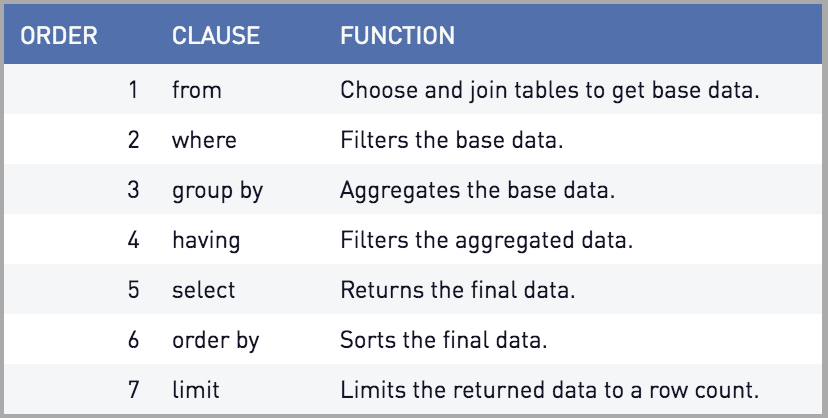

In [51]:
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query = f""" select * from "{mov}" 
where period = '{periodo}'
limit 10
"""
duckdb.query(query)

┌──────────┬───────────────────────────────────────────────────────────────┬───────┬────────┬────────┬────────┬────────┐
│  period  │                              ID                               │ month │ type_1 │ type_2 │ type_3 │ type_4 │
│ varchar  │                            varchar                            │ int64 │ double │ double │ double │ double │
├──────────┼───────────────────────────────────────────────────────────────┼───────┼────────┼────────┼────────┼────────┤
│ period_3 │ e4a728c0b6e0566bb37637e54338698672c527e1520b546c621c0763acf…  │     9 │ 3.4904 │    0.0 │    0.0 │    0.0 │
│ period_3 │ 172bf55ec8b4197f8be481327201a6de4f7b29069e1e39a624bafaaa51a…  │     1 │ 3.6063 │ 4.4938 │ 3.0655 │ 4.7942 │
│ period_3 │ bc4bcaedd6772af60c818dc5a7af1a6a62b2e3838197316b0733e05110c…  │     9 │    0.0 │ 3.1909 │ 2.4795 │ 1.7263 │
│ period_3 │ d884a094580a8f7e80c4fa805c18d0c05929fe5e5310db834a5c8f6b5c4…  │     5 │    5.0 │ 3.6044 │ 2.5161 │    0.0 │
│ period_3 │ 2651ae948881ef7f905

In [ ]:
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query = f""" select * from "{mov}" 
where period = '{periodo}'
limit 10
"""
duckdb.query(query)

In [59]:
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = "period_3"
month = 10
query = f""" select * from "{mov}" 
where period = '{periodo}'
and month = {month}
limit 10
"""
duckdb.query(query)

┌──────────┬───────────────────────────────────────────────────────────────┬───────┬────────┬────────┬────────┬────────┐
│  period  │                              ID                               │ month │ type_1 │ type_2 │ type_3 │ type_4 │
│ varchar  │                            varchar                            │ int64 │ double │ double │ double │ double │
├──────────┼───────────────────────────────────────────────────────────────┼───────┼────────┼────────┼────────┼────────┤
│ period_3 │ f3cee1207b24d6c875e7946bf48c7b5807bfcd24021b9e0b8d418b259a4…  │    10 │    0.0 │ 4.2637 │ 2.8726 │    0.0 │
│ period_3 │ ea2ad21886c5883b245b2a18a8ac2e96edcb621592542b7e094153f1ef8…  │    10 │ 3.7194 │ 2.9406 │    0.0 │    0.0 │
│ period_3 │ d54d2e7d6bf70e9f066669fd7ad2267ce565e715abe23207fc89d5c6b7d…  │    10 │ 1.9203 │ 2.7612 │ 3.5866 │ 3.0789 │
│ period_3 │ 17cbfcffc125f0abd22147151a2b49ade5ebf12e53481533e05f1323833…  │    10 │    0.0 │ 3.2121 │ 3.7892 │    0.0 │
│ period_3 │ ded6579abea947389b6

In [52]:
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query = f""" select period , id, avg(type_1) from "{mov}" 
where period = "{periodo}"
group by 1,2
"""
duckdb.query(query)

BinderException: Binder Error: Referenced column "period_3" not found in FROM clause!
Candidate bindings: "movements.period"

In [60]:
%%time
!cut -d ',' -f 3 /kaggle/input/databbva2023/archive/balances.csv | tail -n +2 | sort | uniq -c


   2042 type_1
  14823 type_2
9814672 type_3
 400894 type_4
 588045 type_5
 777309 type_7
CPU times: user 340 ms, sys: 55.4 ms, total: 395 ms
Wall time: 19.7 s


In [61]:
!head /kaggle/input/databbva2023/archive/balances.csv -n 3


month,ID,type,product,entity,balance_amount,days_default,period
11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab173cacfdb75cf1386b,type_7,product_2,entity_2,3.4051,5.0,period_5
10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa328abcfe34d436c5e5e,type_7,product_2,entity_1,3.4003,5.0,period_5


In [66]:
%%time
!free -h
balances = "/kaggle/input/databbva2023/archive/balances.csv"
periodo = 'period_3'
query = f""" select type, count() from "{balances}" 
group by 1
"""
duckdb.query(query)


              total        used        free      shared  buff/cache   available
Mem:           31Gi       1.8Gi        21Gi       0.0Ki       8.0Gi        29Gi
Swap:            0B          0B          0B
CPU times: user 119 ms, sys: 42 ms, total: 161 ms
Wall time: 1.25 s


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────┬──────────────┐
│  type   │ count_star() │
│ varchar │    int64     │
├─────────┼──────────────┤
│ type_7  │       777309 │
│ type_3  │      9814672 │
│ type_1  │         2042 │
│ type_4  │       400894 │
│ type_2  │        14823 │
│ type_5  │       588045 │
└─────────┴──────────────┘

In [67]:
%%time
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query = f""" select period, ID, avg(type_1) from "{mov}" 
where period = '{periodo}'
group by 1,2
"""
duckdb.query(query)

CPU times: user 105 ms, sys: 26 ms, total: 131 ms
Wall time: 132 ms


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────┬──────────────────────────────────────────────────────────────────┬────────────────────┐
│  period  │                                ID                                │    avg(type_1)     │
│ varchar  │                             varchar                              │       double       │
├──────────┼──────────────────────────────────────────────────────────────────┼────────────────────┤
│ period_3 │ d5150a36f71f648885b2fc6614377f8be470af17116b05d78b4fd3fc73de9222 │             0.8166 │
│ period_3 │ 80e0d2d13cad100af297147287fbaa732c4239f85e2501fdce054e8a690c0479 │ 2.7041749999999998 │
│ period_3 │ 24154d77ce3f4ab17b16a4f1c4b3427a480a9d9fbf4a58819f1e3effd66d4ac7 │ 2.9067363636363637 │
│ period_3 │ 89745583179d748527f4f38d4316a1225997c588c07fd030d31d3c144cde1f7b │                0.0 │
│ period_3 │ 99c075d6ee9747a7ba9d144a81674fbe28e892b4433ae2a26b12f99eccac29a0 │ 3.1376666666666666 │
│ period_3 │ 6e429b77a3bbb4f984e989c1af3daec5ae01e87d4ef202e39f0604f440aa542d │ 1.715628571

In [69]:
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query = f""" select period, count() from "{mov}" 
group by 1
limit 10
"""
duckdb.query(query)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────┬──────────────┐
│  period  │ count_star() │
│ varchar  │    int64     │
├──────────┼──────────────┤
│ period_1 │       386704 │
│ period_5 │       416943 │
│ period_2 │       396386 │
│ period_6 │       417400 │
│ period_4 │       414415 │
│ period_8 │       416733 │
│ period_9 │       429224 │
│ period_7 │       413132 │
│ period_3 │       406801 │
└──────────┴──────────────┘

In [70]:
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query2 = f""" select period, ID, avg(type_1) as  avg_type1 from "{mov}" 
where period = '{periodo}'
group by 1,2

"""
df = duckdb.query(query2).df()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,period,ID,avg_type1
0,period_3,e6df8dc0bf83deb0f39ca66502db99c4540062b59f6261...,2.118436
1,period_3,fc7f3e5d12f56c178e2cb41853ae4c21b2e6f90ceb7a97...,2.693475
2,period_3,5be02dc7d0f0c9c90ba913c3548ee369aff0ee635c2323...,0.000000
3,period_3,dfd2ae2e83fe50ee9ca0816719e8f75cb03b4e19510009...,0.925375
4,period_3,ea609d1cb03b3cd715adeca6b62c7e994178027cce7bce...,0.505640
...,...,...,...
57835,period_3,5c077494cc94559e2ab067414dc0f85707a6c862e63c80...,0.000000
57836,period_3,92903efb647ba0940730cc0fe181abb985ba1933e65125...,0.000000
57837,period_3,bd363e7b283a8c166e4aa23ffe43558feef7919efea2d8...,0.000000
57838,period_3,ad51debdfd8a62882703d6827053addcc4f156ff4bb2cd...,0.000000


In [71]:
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query2 = f""" select * from "{mov}" 
where ID = 'ae9550410167dd2ffe871ecc005712d31d0077a67c9fa2245f08be0cb71a2f35'

"""
duckdb.query(query2).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,period,ID,month,type_1,type_2,type_3,type_4
0,period_3,ae9550410167dd2ffe871ecc005712d31d0077a67c9fa2...,4,0.0,3.3152,0.0,0.0


In [78]:
%%time
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
historia = 8
query2 = f""" select period, ID, avg(type_1) as  avg_type1 from "{mov}" 
where period = '{periodo}'
and month >= 12 - {historia}+1
group by 1,2

"""
df = duckdb.query(query2).df()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

CPU times: user 10.5 s, sys: 320 ms, total: 10.8 s
Wall time: 3.1 s


,period,ID,avg_type1
0,period_3,7f7118c42472bb90de61efb9dc67246c8f210074823f83...,1.675133
1,period_3,03c99fb9b51ea4cd98b587d7da0553790fd4644c5192ef...,3.329613
2,period_3,7967ad84d4ae072377afbc5a9dc90deb68c2dcc737fd5c...,2.160433
3,period_3,3544a4e8ea83565798504837f4ffadddac5aa92f20f55d...,2.132837
4,period_3,f06f802b8e829975adeb82cd46ed9b7bd2315ff06ce4f1...,3.640700
...,...,...,...
55135,period_3,e716048b9c90e0a4306a8767a408a17dbe92e909151249...,0.000000
55136,period_3,92903efb647ba0940730cc0fe181abb985ba1933e65125...,0.000000
55137,period_3,bd363e7b283a8c166e4aa23ffe43558feef7919efea2d8...,0.000000
55138,period_3,ad51debdfd8a62882703d6827053addcc4f156ff4bb2cd...,0.000000


In [75]:
%%time
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
historia = 3
query2 = f""" select period, ID, month, type_1 from "{mov}" 
where period = '{periodo}'
and ID = '718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a186383959be27c713aa7fd'


"""
dfx = duckdb.query(query2).df()
dfx

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

CPU times: user 10.4 s, sys: 283 ms, total: 10.7 s
Wall time: 3.05 s


,period,ID,month,type_1
0,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,12,0.0000
1,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,9,0.0000
2,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,6,0.0000
3,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,8,4.8461
4,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,2,0.0000
5,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,1,2.7219
6,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,4,0.0000
7,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,5,0.0000
8,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,3,0.0000
9,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,10,0.0000


In [79]:
df[df.ID =='718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a186383959be27c713aa7fd']

,period,ID,avg_type1
13850,period_3,718e1569b1d0c76ae70b6dc5bd2da386d541c6fc5a1863...,0.605762


In [51]:
%%time
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
historia = 3
query2 = f""" select period, ID, avg(type_1) as  avg_type1 from "{mov}" 
where period = '{periodo}'
and month >= 12 - {historia}+1
group by 1,2

"""
df = duckdb.query(query2).df()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

CPU times: user 10.5 s, sys: 462 ms, total: 11 s
Wall time: 3.57 s


,period,ID,avg_type1
0,period_3,6f425a5233f7e13db4a9f861db6309868e16de291d8963...,4.097000
1,period_3,0164b0bcd696df7ad5e0035469c53216b6736775faa35e...,3.901567
2,period_3,eed65dec04a95b4b952cfa0c3149fabb45e29fb610faf8...,0.000000
3,period_3,2c2b46d76780f7cee42cc29dd4e9baf3a35d4318e5d17a...,1.188400
4,period_3,a445038ac68b6ac337b710738f639c5123e324deb3216e...,1.517433
...,...,...,...
47810,period_3,d17c0c3dbfcf5eb99772cc141578ffa38354386314800a...,0.000000
47811,period_3,7f332b106be2dfd248ff0f8ec22b0ddb3bdfe710fbe5f0...,4.341500
47812,period_3,ab4bf189b2716d47f5c7f1f3863624dc0d980fb0ffd40f...,0.000000
47813,period_3,0fba587f8a855cd3fac49a2635b5a29054722feda84119...,4.222900


In [17]:
'd353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93bc05cc'

'd353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93bc05cc'

In [80]:
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query2 = f""" select * from "{mov}" 
where ID = 'd353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93bc05cc'

"""
duckdb.query(query2)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────┬───────────────────────────────────────────────────────────────┬───────┬────────┬────────┬────────┬────────┐
│  period  │                              ID                               │ month │ type_1 │ type_2 │ type_3 │ type_4 │
│ varchar  │                            varchar                            │ int64 │ double │ double │ double │ double │
├──────────┼───────────────────────────────────────────────────────────────┼───────┼────────┼────────┼────────┼────────┤
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │    12 │ 3.5122 │ 2.5442 │    0.0 │    0.0 │
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │     5 │ 3.9483 │ 3.6646 │    0.0 │    0.0 │
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │     2 │ 3.9716 │  3.919 │ 2.7508 │    0.0 │
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │     3 │  3.887 │ 3.9679 │    0.0 │    0.0 │
│ period_3 │ d353382bb5f20eb3486

In [81]:
(3.5122+3.4783+3.6899 )/3

3.5601333333333334

In [82]:
df[df.ID =='d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93bc05cc']

,period,ID,avg_type1
33537,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,3.442775


In [83]:
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query2 = f""" select * from "{mov}" A
where A.ID = 'd353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93bc05cc'

"""
duckdb.query(query2)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────┬───────────────────────────────────────────────────────────────┬───────┬────────┬────────┬────────┬────────┐
│  period  │                              ID                               │ month │ type_1 │ type_2 │ type_3 │ type_4 │
│ varchar  │                            varchar                            │ int64 │ double │ double │ double │ double │
├──────────┼───────────────────────────────────────────────────────────────┼───────┼────────┼────────┼────────┼────────┤
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │    12 │ 3.5122 │ 2.5442 │    0.0 │    0.0 │
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │     5 │ 3.9483 │ 3.6646 │    0.0 │    0.0 │
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │     2 │ 3.9716 │  3.919 │ 2.7508 │    0.0 │
│ period_3 │ d353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93b…  │     3 │  3.887 │ 3.9679 │    0.0 │    0.0 │
│ period_3 │ d353382bb5f20eb3486

In [84]:
digital = '/kaggle/input/databbva2023/digital.csv'
sample_submission = '/kaggle/input/databbva2023/archive/sample_submission.csv'
balances='/kaggle/input/databbva2023/archive/balances.csv'
universe_train = '/kaggle/input/databbva2023/archive/universe_train.csv'
movements = '/kaggle/input/databbva2023/archive/movements.csv'
liabilities = '/kaggle/input/databbva2023/archive/liabilities.csv'
universe_test = '/kaggle/input/databbva2023/archive/universe_test.csv'
customers ='/kaggle/input/databbva2023/archive/customers.csv'

In [85]:
# " "  ''
periodo = 'period_3'
query2 = f""" select * from "{customers}" A
where A.ID = 'd353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93bc05cc'

"""
duckdb.query(query2)

┌──────────────────────┬────────┬────────┬──────────────────────┬───┬───────────┬─────────┬─────────┬─────────┐
│          ID          │  age   │ income │ time_from_speciali…  │ … │ product_4 │ ofert_1 │ ofert_2 │ ofert_3 │
│       varchar        │ double │ double │        double        │   │  varchar  │ varchar │ varchar │ varchar │
├──────────────────────┼────────┼────────┼──────────────────────┼───┼───────────┼─────────┼─────────┼─────────┤
│ d353382bb5f20eb348…  │ 4.4112 │ 4.4269 │                  0.0 │ … │ Yes       │ No      │ Yes     │ No      │
├──────────────────────┴────────┴────────┴──────────────────────┴───┴───────────┴─────────┴─────────┴─────────┤
│ 1 rows                                                                                 14 columns (8 shown) │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [94]:
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query2 = f""" select A.period, A.ID, A.month, A.type_1, A.type_2, 
A.type_3, A.type_3, 
B.age, B.income, 
from "{mov}" A
inner join '{customers}' B
on A.ID =  B.ID

limit 10
"""
df = duckdb.query(query2).to_df()
print(df.columns)
df

Index(['period', 'ID', 'month', 'type_1', 'type_2', 'type_3', 'type_3_2',
       'age', 'income'],
      dtype='object')


,period,ID,month,type_1,type_2,type_3,type_3_2,age,income
0,period_1,9856e1fadc3e3a24780beb68005026c9a8dbf9962ad5ae...,12,3.2712,2.2624,2.8494,2.8494,4.1730,4.2430
1,period_1,a768ad779f1b323ace5d233bc520e2936fb8f073b55b77...,5,3.2693,0.0000,3.2023,3.2023,4.3345,4.1313
2,period_1,6cc6eaecb0f0bb5f2639ddfcbd8fecbc7637bd5f026ef6...,8,1.1807,0.0000,0.0000,0.0000,3.6788,3.9699
3,period_1,24a41c875535a11fed23b7fe008452dbcff9aafa3305d9...,5,2.8324,1.9777,3.0407,3.0407,3.9341,4.1121
4,period_1,8ffafd15dcd6b2adda3f852becc5fb12adfc4c23f8774b...,5,3.4381,3.5105,0.0000,0.0000,4.1575,4.4980
5,period_1,187e5ccd228256788f4abddaeb1a332cac56b8771d25c8...,12,0.0000,2.1616,0.0000,0.0000,4.1848,4.2128
6,period_1,581eafe528ac3bd5c9d41318d5b7743a012d0b656ebe0f...,10,0.0000,3.6575,1.8065,1.8065,3.8283,4.2513
7,period_1,127b86709d188f915027c550cfeb077e12e50f1d75aad2...,12,0.0000,0.0000,1.8682,1.8682,3.5729,3.8790
8,period_1,b0036cf0ab326c245be08d4640031f1600662e98de0d42...,9,0.0000,3.6058,0.0000,0.0000,4.8290,4.1887
9,period_1,916bd1c46c9d5298b1cbbd1cfd5e46d80d66927cbd46f1...,8,4.5409,5.0000,4.8755,4.8755,4.6862,4.5981


In [95]:
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
query2 = f""" select A.period, A.ID, A.month, A.type_1, A.type_2, 
A.type_3, A.type_3, 
B.age, B.income, 
from "{mov}" A
inner join '{customers}' B
on A.ID =  B.ID
where A.ID = 'd353382bb5f20eb3486ace9479be1ff400ec291868a3034493d6afdd93bc05cc'

limit 10
"""
df = duckdb.query(query2).to_df()
print(df.columns)
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Index(['period', 'ID', 'month', 'type_1', 'type_2', 'type_3', 'type_3_2',
       'age', 'income'],
      dtype='object')


,period,ID,month,type_1,type_2,type_3,type_3_2,age,income
0,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,8,3.6285,3.3766,0.0000,0.0000,4.4112,4.4269
1,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,7,3.1339,2.7444,3.4718,3.4718,4.4112,4.4269
2,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,3,3.8870,3.9679,0.0000,0.0000,4.4112,4.4269
3,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,9,3.0912,3.5979,0.0000,0.0000,4.4112,4.4269
4,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,5,3.9483,3.6646,0.0000,0.0000,4.4112,4.4269
5,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,2,3.9716,3.9190,2.7508,2.7508,4.4112,4.4269
6,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,11,3.4783,3.8362,0.0000,0.0000,4.4112,4.4269
7,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,10,3.6899,0.0000,0.0000,0.0000,4.4112,4.4269
8,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,1,3.5754,4.1576,0.0000,0.0000,4.4112,4.4269
9,period_3,d353382bb5f20eb3486ace9479be1ff400ec291868a303...,12,3.5122,2.5442,0.0000,0.0000,4.4112,4.4269


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────┬──────────────────────┬───────┬────────┬────────┬───┬───────────┬───────────┬─────────┬─────────┬─────────┐
│  period  │          ID          │ month │ type_1 │ type_2 │ … │ product_3 │ product_4 │ ofert_1 │ ofert_2 │ ofert_3 │
│ varchar  │       varchar        │ int64 │ double │ double │   │  varchar  │  varchar  │ varchar │ varchar │ varchar │
├──────────┼──────────────────────┼───────┼────────┼────────┼───┼───────────┼───────────┼─────────┼─────────┼─────────┤
│ period_3 │ d353382bb5f20eb348…  │     8 │ 3.6285 │ 3.3766 │ … │ No        │ Yes       │ No      │ Yes     │ No      │
│ period_3 │ d353382bb5f20eb348…  │     7 │ 3.1339 │ 2.7444 │ … │ No        │ Yes       │ No      │ Yes     │ No      │
│ period_3 │ d353382bb5f20eb348…  │    12 │ 3.5122 │ 2.5442 │ … │ No        │ Yes       │ No      │ Yes     │ No      │
│ period_3 │ d353382bb5f20eb348…  │     9 │ 3.0912 │ 3.5979 │ … │ No        │ Yes       │ No      │ Yes     │ No      │
│ period_3 │ d353382bb5f20eb348…  │     

In [97]:
# " "  ''
mov = "/kaggle/input/databbva2023/archive/movements.csv"
periodo = 'period_3'
historia = 12
query2 = f""" with mov_12 as ( 
select period, ID, avg(type_1) as  avg_type1 from "{mov}" 
where period = '{periodo}'
and month >= 12 - {historia}+1
group by 1,2 )
select * from mov_12 limit 10

"""
duckdb.query(query2)
df = duckdb.query(query2)

# df = duckdb.query(query2).df()
# df

In [98]:
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────┬──────────────────────────────────────────────────────────────────┬─────────────────────┐
│  period  │                                ID                                │      avg_type1      │
│ varchar  │                             varchar                              │       double        │
├──────────┼──────────────────────────────────────────────────────────────────┼─────────────────────┤
│ period_3 │ 4eefd65d08f26f335c7a246901b9d5f11a342af5393e3481bfd3febc734a4cad │  1.3626333333333334 │
│ period_3 │ 03cf8125943dda099cfa7bf818361f6b76eeb9aef4dae9325cdccd9636101493 │  1.6822555555555556 │
│ period_3 │ 7104465f6e39076d6b0cd73415c491511c9f4a36c92b1080dee9a670aa812852 │ 0.35446666666666665 │
│ period_3 │ 7557ce67da50aebdcc429bb42bde425d04ef8f2ee0cd1ceae73047105f95e15c │  1.9953400000000001 │
│ period_3 │ 293f615584b239248bef60b570e0fe0d9b4b6fe36c309c1c525aa2e03e793b08 │             2.88832 │
│ period_3 │ 6906a679c6995291fd87edc56bcc606c4b5257cc283d474b2fbeaf3b355b95cd │  1

In [101]:
%%time
# " "  ''
periodo = 'period_3'
query2 = f""" select avg(A.age) age_mean,  approx_quantile(A.age, 0.5) as age_median, 
 approx_quantile(A.age, 0.25) as age_q1 ,  approx_quantile(A.age, 0.75) as age_q3,
 min(A.age) age_min, max(A.age) age_max, stddev_pop(A.age) age_std
from "{customers}" A

"""
df = duckdb.query(query2).to_df()
df

CPU times: user 3.7 s, sys: 126 ms, total: 3.83 s
Wall time: 1.52 s


,age_mean,age_median,age_q1,age_q3,age_min,age_max,age_std
0,4.275201,4.266457,4.001513,4.549358,0.0,5.0,0.377544


In [106]:
#crear describe_sql(tabla, x)
def describe_tabla(tabla, x):
    query =f""" select avg(A.{x}) {x}_mean,  approx_quantile(A.{x}, 0.5) as {x}_median, 
 approx_quantile(A.{x}, 0.25) as {x}_q1 ,  approx_quantile(A.{x}, 0.75) as {x}_q3,
 min(A.{x}) {x}_min, max(A.{x}) {x}_max, stddev_pop(A.{x}) {x}_std
from "{tabla}" A
"""
    df = duckdb.query(query).to_df()
    return df

def describe_tabla_2c(tabla, x, y):
    query =f""" select avg(A.{x}) {x}_mean,  approx_quantile(A.{x}, 0.5) as {x}_median, 
 approx_quantile(A.{x}, 0.25) as {x}_q1 ,  approx_quantile(A.{x}, 0.75) as {x}_q3,
 min(A.{x}) {x}_min, max(A.{x}) {x}_max, stddev_pop(A.{x}) {x}_std,
 avg(A.{y}) {y}_mean,  approx_quantile(A.{y}, 0.5) as {y}_median, 
 approx_quantile(A.{y}, 0.25) as {y}_q1 ,  approx_quantile(A.{y}, 0.75) as {y}_q3,
 min(A.{x}) {x}_min, max(A.{y}) {y}_max, stddev_pop(A.{y}) {y}_std
from "{tabla}" A
"""
    df = duckdb.query(query).to_df()
    return df


In [105]:
describe_tabla(customers, 'income')

,income_mean,income_median,income_q1,income_q3,income_min,income_max,income_std
0,4.284237,4.28651,4.098478,4.510092,0.0,5.0,0.477204


In [108]:
describe_tabla_2c(customers, 'income', 'age')

,income_mean,income_median,income_q1,income_q3,income_min,income_max,income_std,age_mean,age_median,age_q1,age_q3,income_min_2,age_max,age_std
0,4.284237,4.286513,4.098472,4.509982,0.0,5.0,0.477204,4.275201,4.266483,4.001146,4.549395,0.0,5.0,0.377544


In [41]:
!head {customers}

ID,age,income,time_from_specialized,type_job,bureau_risk,payroll,product_1,product_2,product_3,product_4,ofert_1,ofert_2,ofert_3
42af3bf64c2c14307361e970e76c9653df78b21583897195e8812988b9e05e53,4.2484,4.1259,0.0,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No
5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926d13510ef0633f0a147,4.6903,3.957,0.0,type_7,category_9,0.0,No,No,No,Yes,No,No,No
8e40f988dd93417a0a40c32e65386425d891c879fedf4c1fe437f77191c03d5e,4.1682,4.464,0.0,type_7,category_5,0.0,No,No,No,Yes,No,No,No
0e48974ce6e81d9e81a8da780521a2f98fb2385dc879dfae904c08fc3fce1c1f,3.9651,4.0966,0.0,type_7,category_3,0.0,Yes,Yes,Yes,Yes,No,No,No
e033c53b4fb230de5da6868503a9e079b289e064d62de408bf61385bed8e3d90,3.9576,4.1876,0.0,type_7,category_5,0.0,Yes,No,No,Yes,No,No,No
f846014a2fbc04fb23613ffe53eb039f0a53833eb04371b0505a0a2ceb04a184,3.7683,4.0812,0.0,type_7,category_7,0.0,No,No,No,Yes,No,No,No
b321c9a38e5eb34e08188904bdad707848af77767e94c17451ce19db3f83fcdb,4.502,4.975,4.7983,type_2,category_2,4

In [100]:
%%time
!free -h
df = pd.read_csv(customers, usecols=['age'])
!free -h
print(df.head())
df.age.describe()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       1.8Gi        21Gi       0.0Ki       8.0Gi        29Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       1.8Gi        21Gi       0.0Ki       8.0Gi        29Gi
Swap:            0B          0B          0B
      age
0  4.2484
1  4.6903
2  4.1682
3  3.9651
4  3.9576
CPU times: user 1.07 s, sys: 96.9 ms, total: 1.17 s
Wall time: 3.38 s


count    809579.000000
mean          4.275201
std           0.377544
min           0.000000
25%           4.001100
50%           4.266700
75%           4.549500
max           5.000000
Name: age, dtype: float64

In [45]:
digital = '/kaggle/input/databbva2023/digital.csv'
sample_submission = '/kaggle/input/databbva2023/archive/sample_submission.csv'
balances='/kaggle/input/databbva2023/archive/balances.csv'
universe_train = '/kaggle/input/databbva2023/archive/universe_train.csv'
movements = '/kaggle/input/databbva2023/archive/movements.csv'
liabilities = '/kaggle/input/databbva2023/archive/liabilities.csv'
universe_test = '/kaggle/input/databbva2023/archive/universe_test.csv'
customers ='/kaggle/input/databbva2023/archive/customers.csv'

(809579, 1)

In [110]:
!head {universe_train} -n 10

ID,attrition,period
4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117fc9fa8a18b6c03a7463,0,period_5
bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a350a66bc5886a3a2735,0,period_5
270d8f8f607d19886c50edb7746c3670194134b56d31e2389b95baa046e8e81a,0,period_5
5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d1f6c77968679cfa4a9,0,period_5
98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7f26130b02106f2326c,0,period_5
56fe8d95f1af9103e92ce450ece54b4647ccb001a866e61fb1754a8be9b66f8b,1,period_5
f728012da429bb829188103c2cb56ef496a7b7e27360fd992aa3a3686735b2e9,0,period_5
9bcc48234dd33f97a9e5d475d39fcb4d562bd7489404d1aa3521b0178fc44ef6,0,period_5
d8e3721b57230439133fd302f51312c6872eec574877a9b83b026059694cc44b,0,period_5


In [119]:
# " "  ''

query2 = f""" select attrition, period, count() as cantidad from '{universe_train}'
group by attrition,period
"""
duckdb.query(query2)
df = duckdb.query(query2).to_df()
df
# df = duckdb.query(query2).df()
# df

,attrition,period,cantidad
0,4,period_6,1322
1,4,period_4,1110
2,0,period_5,79111
3,1,period_3,7434
4,5,period_3,1282
5,2,period_3,940
6,3,period_3,541
7,4,period_2,1097
8,0,period_1,74991
9,1,period_6,8895


In [124]:
# " "  ''

query2 = f""" select attrition, period, count() as cantidad from '{universe_train}'
group by 1,2
"""
duckdb.query(query2)
df = duckdb.query(query2).to_df()
df.pivot(columns = ['attrition'], index = 'period', values = 'cantidad')


attrition,0,1,2,3,4,5
period,,,,,,
period_1,74991,7329,872,512,1137,1187
period_2,75824,7752,967,539,1097,1207
period_3,77704,7434,940,541,1097,1282
period_4,78894,7860,989,596,1110,1471
period_5,79111,7901,1095,592,1130,1710
period_6,77551,8895,1066,606,1322,1632


In [132]:
%%time
!free -h
df = pd.read_csv(customers, usecols = ['bureau_risk', 'income'] )
print(df.head())
!free -h
df.groupby('bureau_risk').income.mean()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.1Gi        21Gi       0.0Ki       8.0Gi        28Gi
Swap:            0B          0B          0B
   income bureau_risk
0  4.1259  category_4
1  3.9570  category_9
2  4.4640  category_5
3  4.0966  category_3
4  4.1876  category_5
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.1Gi        21Gi       0.0Ki       8.0Gi        28Gi
Swap:            0B          0B          0B
CPU times: user 1.19 s, sys: 123 ms, total: 1.31 s
Wall time: 3.52 s


bureau_risk
category_1    4.456957
category_2    4.428876
category_3    4.411012
category_4    4.368938
category_5    4.345455
category_6    4.331518
category_7    4.319121
category_8    4.316131
category_9    3.964374
Name: income, dtype: float64

bureau_risk
category_1    4.456957
category_2    4.428876
category_3    4.411012
category_4    4.368938
category_5    4.345455
category_6    4.331518
category_7    4.319121
category_8    4.316131
category_9    3.964374
Name: income, dtype: float64

In [133]:
%%time
# " "  ''

query2 = f""" select bureau_risk, avg(income) as cantidad from '{customers}'
group by 1
order by 1 asc
"""
duckdb.query(query2)


CPU times: user 150 ms, sys: 29 ms, total: 179 ms
Wall time: 179 ms


┌─────────────┬────────────────────┐
│ bureau_risk │      cantidad      │
│   varchar   │       double       │
├─────────────┼────────────────────┤
│ category_1  │   4.45695672219787 │
│ category_2  │  4.428875592341257 │
│ category_3  │   4.41101175314086 │
│ category_4  │  4.368937758366991 │
│ category_5  │  4.345455490234195 │
│ category_6  │  4.331517908216669 │
│ category_7  │ 4.3191214130723425 │
│ category_8  │  4.316131039635671 │
│ category_9  │ 3.9643737173085976 │
└─────────────┴────────────────────┘

In [134]:
!head {balances} -n 5

month,ID,type,product,entity,balance_amount,days_default,period
11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab173cacfdb75cf1386b,type_7,product_2,entity_2,3.4051,5.0,period_5
10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa328abcfe34d436c5e5e,type_7,product_2,entity_1,3.4003,5.0,period_5
6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e0399ad8f67a3888dc5,type_7,product_2,entity_5,3.0592,5.0,period_5
6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254707bd19a63dca52202,type_7,product_2,entity_2,2.8013,5.0,period_5


In [135]:
%%time
# " "  ''

query2 = f""" select entity, avg(balance_amount) as cantidad from '{balances}'
group by 1
order by 1 asc
"""
duckdb.query(query2)


CPU times: user 120 ms, sys: 32.1 ms, total: 152 ms
Wall time: 151 ms


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────┬────────────────────┐
│  entity  │      cantidad      │
│ varchar  │       double       │
├──────────┼────────────────────┤
│ entity_1 │  3.503956131987014 │
│ entity_2 │  3.634241663757494 │
│ entity_3 │  3.878124214328246 │
│ entity_4 │ 3.6165476856700054 │
│ entity_5 │ 3.4254763015022984 │
└──────────┴────────────────────┘

In [136]:
%%time
!free -h
df = pd.read_csv(balances, usecols = ['entity', 'balance_amount'] )
print(df.head())
!free -h
df.groupby('entity').balance_amount.mean()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.2Gi        21Gi       0.0Ki       8.0Gi        28Gi
Swap:            0B          0B          0B
     entity  balance_amount
0  entity_2          3.4051
1  entity_1          3.4003
2  entity_5          3.0592
3  entity_2          2.8013
4  entity_2          2.9850
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.3Gi        20Gi       0.0Ki       8.0Gi        28Gi
Swap:            0B          0B          0B
CPU times: user 14.3 s, sys: 762 ms, total: 15.1 s
Wall time: 17.3 s


entity
entity_1    3.503956
entity_2    3.634242
entity_3    3.878124
entity_4    3.616548
entity_5    3.425476
Name: balance_amount, dtype: float64

In [159]:
%%time
# " "  '' approx_quantile(A.{x}, 0.5) 

query2 = f""" select min(age),approx_quantile(age, 0.333), 
approx_quantile(age, 0.666), max(age)  from '{customers}'

"""
duckdb.query(query2)


CPU times: user 153 ms, sys: 26 ms, total: 179 ms
Wall time: 177 ms


┌──────────┬─────────────────────────────┬─────────────────────────────┬──────────┐
│ min(age) │ approx_quantile(age, 0.333) │ approx_quantile(age, 0.666) │ max(age) │
│  double  │           double            │           double            │  double  │
├──────────┼─────────────────────────────┼─────────────────────────────┼──────────┤
│      0.0 │           4.088805008733721 │          4.4464091598511954 │      5.0 │
└──────────┴─────────────────────────────┴─────────────────────────────┴──────────┘

In [168]:
%%time
# " "  '' approx_quantile(A.{x}, 0.5) 

query2 = f""" with age_income as (
select income, 
case 
    when age>4.4467 then 'SENIOR'
    when age>4.0890 then 'MEDIO'
    else 'JUNIOR'
end age_cat 
from '{customers}' )

select age_cat, avg(income), max(income), min(income),
 approx_quantile(income, 0.5),  approx_quantile(income, 0.75),
  approx_quantile(income, 0.25)
from age_income
group by 1

"""
df = duckdb.query(query2).to_df()
df


CPU times: user 3.79 s, sys: 111 ms, total: 3.9 s
Wall time: 1.35 s


,age_cat,avg(income),max(income),min(income),"approx_quantile(income, 0.5)","approx_quantile(income, 0.75)","approx_quantile(income, 0.25)"
0,MEDIO,4.368029,5.0,0.0,4.358618,4.578553,4.175998
1,SENIOR,4.253125,5.0,0.0,4.273719,4.526114,4.060233
2,JUNIOR,4.231826,5.0,0.0,4.231909,4.423074,4.069634


In [158]:
%%time
!free -h
df = pd.read_csv(customers)
!free -h
df['age_cat'] = ''
i1 = df.age>4.4476 
df.loc[i1, 'age_cat'] = 'SENIOR'
i2 = (df.age>4.0890 )& (df.age<= 4.4476) 
df.loc[i2, 'age_cat'] = 'MEDIO'
df.loc[~(i1|i2), 'age_cat'] = 'JUNIOR'
df.groupby('age_cat').income.describe()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.6Gi        20Gi       0.0Ki       8.1Gi        28Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.9Gi        20Gi       0.0Ki       8.1Gi        28Gi
Swap:            0B          0B          0B
CPU times: user 2.62 s, sys: 687 ms, total: 3.31 s
Wall time: 5.53 s


,count,mean,std,min,25%,50%,75%,max
age_cat,,,,,,,,
JUNIOR,269873.0,4.231826,0.429084,0.0,4.0696,4.2319,4.42340,5.0
MEDIO,269891.0,4.368085,0.392326,0.0,4.1760,4.3584,4.57780,5.0
SENIOR,269815.0,4.252788,0.578275,0.0,4.0602,4.2732,4.52565,5.0


<Axes: xlabel='age', ylabel='income'>

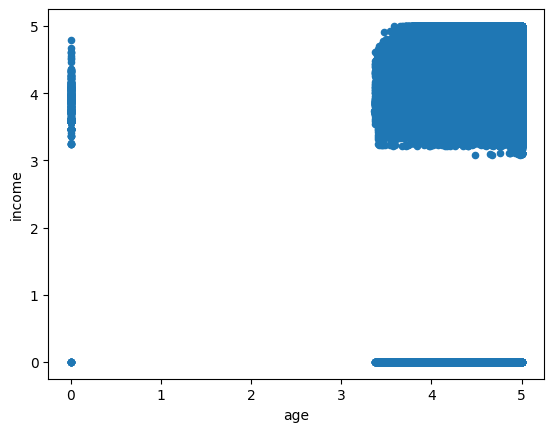

In [143]:
df.plot(x = 'age', y = 'income', kind = 'scatter')

In [144]:
df.age.quantile([.33333,.66666])

0.33333    4.0890
0.66666    4.4476
Name: age, dtype: float64

,ID,age,income,time_from_specialized,type_job,bureau_risk,payroll,product_1,product_2,product_3,product_4,ofert_1,ofert_2,ofert_3,age_cat
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No,MEDIO
1,5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926...,4.6903,3.9570,0.0,type_7,category_9,0.0000,No,No,No,Yes,No,No,No,SENIOR
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0,type_7,category_5,0.0000,No,No,No,Yes,No,No,No,MEDIO
3,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0,type_7,category_3,0.0000,Yes,Yes,Yes,Yes,No,No,No,JUNIOR
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0,type_7,category_5,0.0000,Yes,No,No,Yes,No,No,No,JUNIOR


,count,mean,std,min,25%,50%,75%,max
age_cat,,,,,,,,
JUNIOR,269873.0,4.231826,0.429084,0.0,4.0696,4.2319,4.42340,5.0
MEDIO,269891.0,4.368085,0.392326,0.0,4.1760,4.3584,4.57780,5.0
SENIOR,269815.0,4.252788,0.578275,0.0,4.0602,4.2732,4.52565,5.0


In [ ]:
# 'digital_max_dig_11_12'
# fuente, nombre, descripcion
# digital, 'digital_max_dig_11_12', 
#maxima (Cantidad de visitas en un mes) en un periodo de 12 meses


In [169]:
!head {digital} -n 5

month,ID,dig_1,dig_2,dig_3,dig_4,dig_5,dig_6,dig_7,dig_8,dig_9,dig_10,dig_11,period
9,bdc817ca1b6ba0deb42d70bee75e4a4e1a1df5d3c9578c20693e0e27742a991c,0.7329,2.2512,2.9029,3.8084,3.0466,3.2779,0.0,1.0905,2.275,0.0,1.748,period_9
3,7474e915adcf95e11cd85fe1dcb660fee704697ae31f87ed0c09f8c9f0845b66,4.2287,4.6974,2.9029,2.7366,2.2263,4.1667,1.9824,1.0905,1.6208,0.0,0.9672,period_9
11,506ff183d63da44a9106db1202b2b9cc53ca680ddca44d5852caeff7b92d2175,1.7268,3.8201,2.7194,2.5198,1.4561,4.2153,4.2105,2.181,3.6138,0.0,3.3457,period_9
4,f59effceec688938accd3f6b5d0684edb2ad484e7bef4008564bde2ef152baf8,0.0326,1.6499,1.6981,3.7114,2.9214,3.0473,0.0,1.0905,2.275,1.1569,1.748,period_9


In [187]:
%%time
# " "  '' approx_quantile(A.{x}, 0.5) 

historia = 12
var1 = 'dig_11'
query2 = f""" with digital_12M as ( 
select ID, month, period, {var1} 
from '{digital}' 
where month>=12-{historia}+1 ),

 dig_12M as (
select ID, period, avg({var1}) as {var1}_{historia}m
from digital_12M
group by 1, 2 ),

dig_1M as ( select ID, period, {var1} from '{digital}'
where month = 12 )

select dig_12M.ID, dig_12M.{var1}_{historia}m , dig_1M.{var1}
from dig_12M 
inner join dig_1M
on dig_12M.ID = dig_1M.ID 
limit 10
"""
df = duckdb.query(query2).to_df()
df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

CPU times: user 58.1 s, sys: 3.19 s, total: 1min 1s
Wall time: 17.5 s


,ID,dig_11_12m,dig_11
0,e7c6dfec1c7292e5d5565f7588926c4f8eacba56a3fedf...,1.613517,2.2456
1,1dcd17f7aea8f089f8cf55d1c2d28881f0e742d3f5f52d...,2.277450,2.7151
2,799fda9287ec150c74a4e80ceef12e374758cae6505a36...,2.940950,2.9014
3,6f61f2c80a1e1cf2e80db167f933feb755052ca7014484...,1.652375,2.5000
4,871e68134598d98277cf2d16d765485439ba6805a2e629...,2.927283,2.8114
5,c111e8fb6f43aee25f885cc919f79daf95f0e14528a632...,2.104333,0.9672
6,e39ed3b9119bb7109d31d4fe514b1ccba5eaea90d334f0...,0.520991,0.0001
7,2ad3257dcf504ad8c9d4738f0a7862ab7af28e07842966...,3.855450,3.2128
8,521fd7545d87391a2b360342e48dc41b4b3234f2ccb0c8...,4.322317,4.9202
9,994e42d0a4108468d3157dbfd08b3391bde898160c4a2c...,3.579750,3.1412


In [190]:
%%time
# " "  '' approx_quantile(A.{x}, 0.5) 

historia = 12
var1 = 'dig_11'
query2 = f""" with digital_12M as ( 
select ID, month, period, {var1} 
from '{digital}' 
where month>=12-{historia}+1 ),

 dig_12M as (
select ID, period, avg({var1}) as {var1}_{historia}m
from digital_12M
group by 1, 2 ),

dig_1M as ( select ID, period, {var1} from '{digital}'
where month = 12 )

select dig_12M.ID , dig_1M.{var1}/dig_12M.{var1}_{historia}m as rat_{var1}_1m_{historia}m
from dig_12M 
inner join dig_1M
on dig_12M.ID = dig_1M.ID 
limit 10
"""
df = duckdb.query(query2).to_df()
df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

CPU times: user 58.3 s, sys: 1.94 s, total: 1min
Wall time: 16.7 s


,ID,rat_dig_11_1m_12m
0,7474e915adcf95e11cd85fe1dcb660fee704697ae31f87...,1.499610
1,9edd7375f41ac6238b7446d6427f42a9164fe36f2867da...,0.000071
2,396f76a72c4968fff98c9c5e0d05aa7c46f0ccff9f262a...,1.126574
3,71e55c1936b501f5e0d73f50c0deda6f8fa8753fab6dce...,0.950373
4,86659ff1341844960b75161ae7016ca53b4f38de466638...,0.895801
5,96d470499cdc061b198e98b802df3e9288e867781e5cc4...,1.431958
6,e310a94b423e9a49729b7584dddff0e53f08e475686336...,0.992069
7,dfdd176f0764ed397bb1632d3cc9cea4dae85456206bc2...,0.646543
8,58c7ec68205f7e265ec88bb7c27686430083bea4183be7...,0.888485
9,41686161ef22ae8f3280ba8bee5a5fd6b21f014fee678e...,1.450229


In [193]:
%%time
# " "  '' approx_quantile(A.{x}, 0.5) 

historia = 12
var1 = 'dig_11'
query2 = f""" with dig_12M as ( 
select ID, avg({var1}) as {var1}_{historia}m
from '{digital}' 
where month>=12-{historia}+1 
group by 1),


dig_1M as ( select ID, period, {var1} from '{digital}'
where month = 12 )

select dig_12M.ID , dig_1M.{var1}/dig_12M.{var1}_{historia}m as rat_{var1}_1m_{historia}m
from dig_12M 
inner join dig_1M
on dig_12M.ID = dig_1M.ID 

"""
df = duckdb.query(query2).to_df()
df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

CPU times: user 58.1 s, sys: 2.02 s, total: 1min
Wall time: 17.3 s


,ID,rat_dig_11_1m_12m
0,f5af0d83b570c6c0cae16d08efdabc6a43b668f0156cd5...,0.348934
1,7aed4e67237f227cdf79764979779e5d9f5247487fa564...,1.552822
2,c31ebf06441655a2cb4354d43b54006daa6558928997ae...,0.000140
3,25aab826d657eaf1e731cdcb12a292c152af0a02725eea...,1.038672
4,9336d36342c68587f2fc2fd49102a05b456d57b8cd0b7e...,1.335148
...,...,...
580228,116c4515e6b3177b2ebfbc0afcd5bd0e824f2f8c8850b0...,1.000000
580229,06460d434b95bd5eae470f22dfec6e7e06c5ad6dd5a577...,1.000000
580230,e05bb5ccbbef66bf119a655627fabe10ff4163d027961e...,1.000000
580231,8fc5aec14befd11ca661ddddbc9803b180fcd6452a1fe7...,1.000000
